#Third Assignment — Hybrid Quantum-Classical Systems
##Exercise 2: Classical Shadows


> Group 10:
>
> - *Marijana Petojevic* (12017529)
> - *Vedad Hadzic* (12042758)
> - *Sam De Vries* (12503805)

---

## 0. Environment Setup

In [ ]:
!pip install pennylane

In [ ]:
import numpy as np
np.random.seed(999)

import pennylane as qml

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns



---



## 1. Gift state setup

Lets firstly load our matriculation numbers an preprae them for work. All matriculation numbers in our group consist of exactly 8 digits, so no padding is required here and we can load them directly as an array.

In [ ]:
mat_num_1 = np.array([1, 2, 0, 1, 7, 5, 2, 9]) #Marijana
mat_num_2 = np.array([1, 2, 0, 4, 2, 7, 5, 8]) #Vedad
mat_num_3 = np.array([1, 2, 5, 0, 3, 8, 0, 5]) #Sam

---

### (a) Apply $H^{\otimes 8}$ to create a uniform superposition

We start from the computational basis state $\lvert 0 \rangle^{\otimes 8}$, where all
qubits are initialized in the state $\lvert 0 \rangle$.

By applying a Hadamard gate to each of the 8 qubits, we create an equal superposition
over all $2^8 = 256$ possible computational basis states. This means that every basis
state has the same probability amplitude.


Lets look at it in bit more mathemeatical way.
From Lecture 2 (Quantum Gates) we know that the Hadamard gate working on a single qubit is defined as

$$
H \lvert 0 \rangle
=
\frac{1}{\sqrt{2}}
\left( \lvert 0 \rangle + \lvert 1 \rangle \right).
$$

For an 8-qubit system, the Hadamard applied to all qubits is defined by the
tensor product

$$
H^{\otimes 8}
=
H \otimes H \otimes \cdots \otimes H.
$$

Now we can apply it to the initial state $\lvert 0 \rangle^{\otimes 8}$ yields

$$
H^{\otimes 8} \lvert 0 \rangle^{\otimes 8}
=
(H \lvert 0 \rangle)^{\otimes 8}.
$$

For the single-qubit Hadamard action, we receive

$$
(H \lvert 0 \rangle)^{\otimes 8}
=
\left(
\frac{1}{\sqrt{2}}
\left( \lvert 0 \rangle + \lvert 1 \rangle \right)
\right)^{\otimes 8}.
$$

Than, we just extend the tensor product and this gives us an uniform superposition over all computational
basis states:

$$
H^{\otimes 8} \lvert 0 \rangle^{\otimes 8}
=
\frac{1}{\sqrt{2^8}}
\sum_{x \in \{0,1\}^8}
\lvert x \rangle.
$$

In [ ]:
def apply_hadamard_layer():
    for w in range(8):
        qml.Hadamard(wires=w)

---

### (b) Take the first matriculation number. With probability $\frac{i_j}{10}$, apply an $R_x(\theta_j)$ gate to qubit $j$, with $$ \theta_j = 2\pi \cdot \frac{i_j}{10}. $$ Otherwise, apply an $X$ gate. Do this for all 8 qubits.


In [ ]:
def apply_probabilistic_rx_layer(digits, rng):
    for j in range(8):
        p = digits[j] / 10.0
        theta = 2 * np.pi * digits[j] / 10.0

        if rng.random() < p:
            qml.RX(theta, wires=j)
        else:
            qml.PauliX(wires=j)

---

### (c) Apply CZ gates to pairwise qubits (i.e., between qubits 1 and 2, qubits 3 and 4,. . . )


To easily apply the CZ gates to pairwise qubits (for this part and for *e*) where we have two differen patters, we can simply create them directly here:

In [ ]:
def cz_pairs_pattern_1():
    # (1,2), (3,4), (5,6), (7,8)  -> 0-indexed
    return [(0, 1), (2, 3), (4, 5), (6, 7)]

def cz_pairs_pattern_2():
    # (2,3), (4,5), (6,7), (8,1)  -> 0-indexed
    return [(1, 2), (3, 4), (5, 6), (7, 0)]

In [ ]:
def apply_cz_layer_pattern_1():
    """
    Apply CZ gates to pairwise qubits:
    (1,2), (3,4), (5,6), (7,8) in 1-based indexing.
    """
    for a, b in cz_pairs_pattern_1():
        qml.CZ(wires=[a, b])

---

###(d) Take the second matriculation number and do the same, only with Ry and Y gates, respectively.

In [ ]:
def apply_probabilistic_ry_layer(digits, rng):

    for j in range(8):
        p = digits[j] / 10.0
        theta = 2 * np.pi * digits[j] / 10.0

        if rng.random() < p:
            qml.RY(theta, wires=j)
        else:
            qml.PauliY(wires=j)

### (e) Apply CZ gates to pairwise qubits starting at qubit 2 (i.e., qubits 2 and 3, . . . , qubits 8 and 1)

In [ ]:
def apply_cz_layer_pattern_2():
    for a, b in cz_pairs_pattern_2():
        qml.CZ(wires=[a, b])

---

### (f) Take the third matriculation number and do the same, only with Rz gates and Z gates.

In [ ]:
def apply_probabilistic_rz_layer(digits, rng):

    for j in range(8):
        p = digits[j] / 10.0
        theta = 2 * np.pi * digits[j] / 10.0

        if rng.random() < p:
            qml.RZ(theta, wires=j)
        else:
            qml.PauliZ(wires=j)

---
### (g) Apply another Hadmard transform on all qubits.

This part is identical to our implemenation for (a), and we can just reuse it from there (just by calling `apply_hadamard_layer()`).

---
### Lets connect all steps togehter

So once we have defined all the steps from a to g, we can execute them in a squentially with the necessary values. For that we have created the function `gift_state_circuit`:

In [ ]:
def gift_state_circuit(seed=999):
    """
    Full 8-qubit gift-state circuit composed of steps (a)–(g).
    """
    rng = np.random.default_rng(seed)

    # (a)
    apply_hadamard_layer()

    # (b)
    apply_probabilistic_rx_layer(mat_num_1, rng)

    # (c)
    apply_cz_layer_pattern_1()

    # (d)
    apply_probabilistic_ry_layer(mat_num_2, rng)

    # (e)
    apply_cz_layer_pattern_2()

    # (f)
    apply_probabilistic_rz_layer(mat_num_3, rng)

    # (g)
    apply_hadamard_layer()


Lets just check the expectation values of the Pauli
X,
Y, and
Z measurements for each qubit after preparing the final state.

In [ ]:
# Exact simulator (statevector)
dev_exact = qml.device("default.qubit", wires=8, shots=None)

@qml.qnode(dev_exact)
def test_X_qubit(j):
    gift_state_circuit(seed=999)
    return qml.expval(qml.PauliX(j))

for j in range(8):
    print(f"X{j} =", test_X_qubit(j))

X0 = -1.1102230246251565e-16
X1 = -1.1102230246251565e-16
X2 = 1.1102230246251565e-16
X3 = 0.0
X4 = 5.551115123125783e-17
X5 = -5.551115123125783e-17
X6 = 0.0
X7 = 5.551115123125783e-17


In [ ]:
@qml.qnode(dev_exact)
def test_Y_qubit(j):
    gift_state_circuit(seed=999)
    return qml.expval(qml.PauliY(j))

for j in range(8):
    print(f"Y{j} =", test_Y_qubit(j))

Y0 = 1.1102230246251565e-16
Y1 = 1.1102230246251565e-16
Y2 = 0.0
Y3 = 0.0
Y4 = 0.0
Y5 = -5.551115123125783e-17
Y6 = 1.6653345369377348e-16
Y7 = -1.6653345369377348e-16


In [ ]:
@qml.qnode(dev_exact)
def test_Z_qubit(j):
    gift_state_circuit(seed=999)
    return qml.expval(qml.PauliZ(j))

for j in range(8):
    print(f"Z{j} =", test_Z_qubit(j))

Z0 = 0.0
Z1 = 5.551115123125783e-17
Z2 = 0.0
Z3 = -5.551115123125783e-17
Z4 = 0.0
Z5 = -3.3306690738754696e-16
Z6 = -5.551115123125783e-17
Z7 = -4.440892098500626e-16


As we can see from these 3 tests, expectation values of the Pauli X, Y, and Z measurements are close to zero for all qubits. This means that for each qubit, the outcomes +1 and −1 occur with almost equal probability in every measurement basis.

Here, our circuit uses random rotations and entangling gates, which mix the information between all qubits. Because of this, no single qubit contains useful information by itself (instead, the information is spread across several qubits and can only be seen by looking at correlations between qubits).

---

##2. Expectation values for the Pauli measurements

In [ ]:
dev_exact = qml.device("default.qubit", wires=8, shots=None)

gift_observables = {
    "X1 (Milka chocolate 🍫)": qml.PauliX(0),
    "Y1 (A pen 🖊️)": qml.PauliY(0),
    "Z1 (Christmas cookies 🍪)": qml.PauliZ(0),
    "X1 X2 (A new bike 🚲)": qml.PauliX(0) @ qml.PauliX(1),
    "Z1 X2 (Nothing ❌)": qml.PauliZ(0) @ qml.PauliX(1),
    "Y1 Z2 (New quantum computer 💻)": qml.PauliY(0) @ qml.PauliZ(1),
}

@qml.qnode(dev_exact)
def exact_expval_for(obs, seed=999):
    gift_state_circuit(seed=seed)
    return qml.expval(obs)

exact_results = {}
for name, obs in gift_observables.items():
    exact_results[name] = float(exact_expval_for(obs, seed=999))

print("\nGift probabilities (−1 = very unlikely, +1 = very likely):\n")
for name, value in exact_results.items():
    print(f"{name:35s} = {value:8.6f}")

print("\n" + "=" * 70)
most_likely = max(exact_results.items(), key=lambda x: x[1])
least_likely = min(exact_results.items(), key=lambda x: x[1])

print(f"Most likely gift:  {most_likely[0]:35s} ({most_likely[1]:+.6f})")
print(f"Least likely gift: {least_likely[0]:35s} ({least_likely[1]:+.6f})")


Gift probabilities (−1 = very unlikely, +1 = very likely):

X1 (Milka chocolate 🍫)              = -0.000000
Y1 (A pen 🖊️)                       = 0.000000
Z1 (Christmas cookies 🍪)            = 0.000000
X1 X2 (A new bike 🚲)                = 0.951057
Z1 X2 (Nothing ❌)                   = 0.000000
Y1 Z2 (New quantum computer 💻)      = 0.000000

Most likely gift:  X1 X2 (A new bike 🚲)                (+0.951057)
Least likely gift: X1 (Milka chocolate 🍫)              (-0.000000)


As we saw in the previous evaluation, all single-qubit measurements are close to zero.  Therefore, gifts associated with single-qubit observables are neither likely nor unlikely,since each qubit is locally balanced.

An interesting result is the observable $X_1 X_2$, which has a large positive expectation value. This indicates a strong correlation between qubits 1 and 2 (when measured in the X-basis, they tend to give matching results, which is a signature of quantum entanglement).

Based on this result, it looks like we are going to receive a new bike this year 😊


---

## 3. Classical shadow for previous observables

Before starting with the code implementation, lets see the most important parts of the classical shadow theoretically (*required by the last point in the assignment: "Provide the exact formula and reasoning for the shadow norm..."*).

### Classical shadows and sample complexity

Classical shadows provide an efficient way to estimate expectation values of many
quantum observables using randomized measurements. Instead of measuring each
observable separately, we randomly measure each qubit in one of the Pauli bases
$X$, $Y$, or $Z$, and later reconstruct estimates for all observables from the
same measurement data.

The number of measurements required depends on how difficult it is to estimate
the observables. This difficulty is captured by the **shadow norm**
$\|O\|_{\text{shadow}}$.


### Shadow norm for Pauli observables

The lecture 10 (Slide 23) and the PennyLane tutorial explain that, when using random Pauli
measurements, the statistical variance of estimating a Pauli observable grows
exponentially with the number of qubits on which the observable acts. In other
words, observables involving more qubits are harder to estimate
accurately from randomized measurements.

In the classical shadows protocol, each qubit is measured independently in a randomly chosen
Pauli basis from the set {X, Y, Z}. To correctly estimate a given Pauli
observable, all qubits on which the observable acts must be measured in
compatible bases. If even one qubit is measured in a different basis, that
measurement does not contribute useful information for that observable.

Since each qubit has a probability of 1/3 to be measured in the correct basis,
the probability that all k qubits are measured compatibly is (1/3)^k. As a
result, only a fraction (1/3)^k of all measurements contribute to the estimate,
which leads to an exponential increase of the estimator variance by a factor
proportional to 3^k.

This exponential variance scaling is commonly summarized by introducing the
shadow norm, whose squared value scales as 3^k for k-local Pauli observables.

In our case:
- Single-qubit observables ($k=1$) have $\|O\|_{\text{shadow}}^2 = 3$
- Two-qubit observables ($k=2$) have $\|O\|_{\text{shadow}}^2 = 9$

Since our observable set includes two-qubit Pauli operators, the worst-case
shadow norm is $\max_i \|O_i\|_{\text{shadow}}^2 = 9$.


### Sample complexity formula

According to the classical shadows theory (see Lecture 10, Slide 23), the number of measurements $N$ required to estimate
$M$ observables with accuracy $\varepsilon$ and confidence $1-\delta$ is bounded by

$$
N \ge \frac{2 \log(2M/\delta)}{\varepsilon^2}
\max_i \|O_i\|_{\text{shadow}}^2.
$$

In our setting:
- $M = 6$ observables
- $\delta = 0.01$ (99% confidence)
- $\max_i \|O_i\|_{\text{shadow}}^2 = 9$

Therefore, the required number of samples scales as

$$
N \propto \frac{1}{\varepsilon^2},
$$

with the two-qubit observables determining the overall sample complexity.


In [ ]:
M = 6                     # number of observables
delta = 0.01              # failure probability (99% confidence)
max_shadow_norm_sq = 9    # worst-case shadow norm (two-qubit observables)
epsilons = [0.1, 0.05, 0.001, 0.005]

# logarithmic term
log_term = np.log(2 * M / delta)

# num of samples
required_samples = {}
for eps in epsilons:
    N = (2 * log_term / eps**2) * max_shadow_norm_sq
    required_samples[eps] = int(np.ceil(N))

print("Required number of samples for classical shadows:\n")
for eps, N in required_samples.items():
    print(f"ε = {eps:<6} → N ≥ {N:,}")

Required number of samples for classical shadows:

ε = 0.1    → N ≥ 12,763
ε = 0.05   → N ≥ 51,049
ε = 0.001  → N ≥ 127,621,384
ε = 0.005  → N ≥ 5,104,856


The required number of samples increases rapidly as the error bound ε becomes
smaller. This is because the sample complexity of classical shadows scales as
$1/\varepsilon^2$ (higher accuracy -> quadratically more
measurements). As a result, very strict error requirements (such as ε = 0.001)
lead to extremely large sample counts.

---

## 4. Shadow estimation for ε = 0.05

Lets firstly rewrite the `gift_observables` without icons (because they can not be showed on the plots (UTF-8 encoding 😔 )).


In [ ]:
gift_observables = {
    "X1 (Milka chocolate)": qml.PauliX(0),
    "Y1 (A pen)": qml.PauliY(0),
    "Z1 (Christmas cookies)": qml.PauliZ(0),
    "X1 X2 (A new bike)": qml.PauliX(0) @ qml.PauliX(1),
    "Z1 X2 (Nothing)": qml.PauliZ(0) @ qml.PauliX(1),
    "Y1 Z2 (New quantum computer)": qml.PauliY(0) @ qml.PauliZ(1),
}

Now lets prepare the final gift-state circuit and perform many random Pauli measurements.

-> Store measurement outcomes (bits) together with the measurement bases (recipes) to construct a classical shadow of the quantum state.

In [ ]:
TOTAL_SHOTS = 5000
STEP = 100

dev_shadow = qml.device("default.qubit", wires=8, shots=TOTAL_SHOTS)

@qml.qnode(dev_shadow)
def shadow_circuit():
    gift_state_circuit(seed=999)
    return qml.classical_shadow(wires=range(8))

bits, recipes = shadow_circuit()

print("bits shape:", bits.shape)
print("recipes shape:", recipes.shape)

bits shape: (5000, 8)
recipes shape: (5000, 8)


/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:201: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


After we have an bits and recipes, we can eestimate each observable using an increasing number of classical-shadow samples (in steps of 100) to observe how the estimates improve and converge as more measurement data is used.

In [ ]:
snapshot_sizes = list(range(STEP, TOTAL_SHOTS + 1, STEP))
shadow_estimates = {name: [] for name in gift_observables}

ClassicalShadow = qml.shadows.ClassicalShadow

for t in snapshot_sizes:
    b = bits[:t]
    r = recipes[:t]

    # create shadow object
    shadow = ClassicalShadow(b, r)

    # estimate each observable
    for name, obs in gift_observables.items():
        est = shadow.expval(obs)
        shadow_estimates[name].append(float(est))

As a next step, we compute the exact expectation values of all observables using a statevector simulator (to obtain reference values).

In [ ]:
# Exact simulator (statevector)
dev_exact = qml.device("default.qubit", wires=8, shots=None)

@qml.qnode(dev_exact)
def exact_expval(obs, seed=999):
    gift_state_circuit(seed=seed)
    return qml.expval(obs)

# Compute exact reference values
exact_values = {
    name: float(exact_expval(obs))
    for name, obs in gift_observables.items()
}

In [ ]:
# exact simulator (statevector)
dev_exact = qml.device("default.qubit", wires=8, shots=None)

@qml.qnode(dev_exact)
def exact_expval(obs, seed=999):
    gift_state_circuit(seed=seed)
    return qml.expval(obs)

# compute exact reference values
exact_df = pd.DataFrame(
    exact_values.items(),
    columns=["Observable", "Exact exp. value"]
)

exact_df

,Observable,Exact exp. value
0,X1 (Milka chocolate),-1.110223e-16
1,Y1 (A pen),1.110223e-16
2,Z1 (Christmas cookies),0.000000e+00
3,X1 X2 (A new bike),9.510565e-01
4,Z1 X2 (Nothing),2.775558e-17
5,Y1 Z2 (New quantum computer),0.000000e+00


### Plots and discussion

Lets visualise how the classical shadow estimates all observables as the number of measurement samples increases.

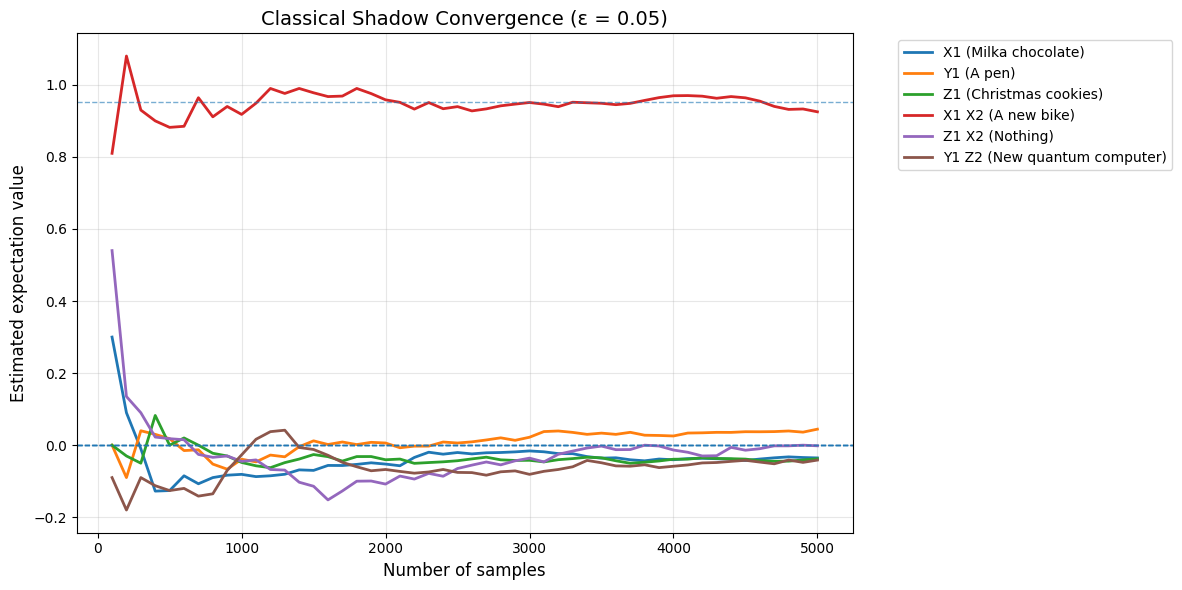

In [ ]:
plt.figure(figsize=(12, 6))

for name, estimates in shadow_estimates.items():
    plt.plot(snapshot_sizes, estimates, label=name, linewidth=2)

    plt.axhline(
        exact_values[name],
        linestyle="--",
        linewidth=1,
        alpha=0.6
    )

plt.xlabel("Number of samples", fontsize=12)
plt.ylabel("Estimated expectation value", fontsize=12)
plt.title("Classical Shadow Convergence (ε = 0.05)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

From the plot its clear that as the number of samples increases, the classical shadow estimates become more stable.

Single-qubit observables converge quickly to values close to zero, which means that no individual qubit carries a strong signal on its own. In contrast, the two-qubit observable X₁X₂ converges to a large positive value, which gives us a strong correlation between qubits 1 and 2 ( relevant information in the circuit is encoded in correlations rather than in single-qubit measurements).

To analyze this in more detail, we can plot the convergence of the classical shadow estimates for each observable as the number of samples increases and compare them to the exact expectation values.

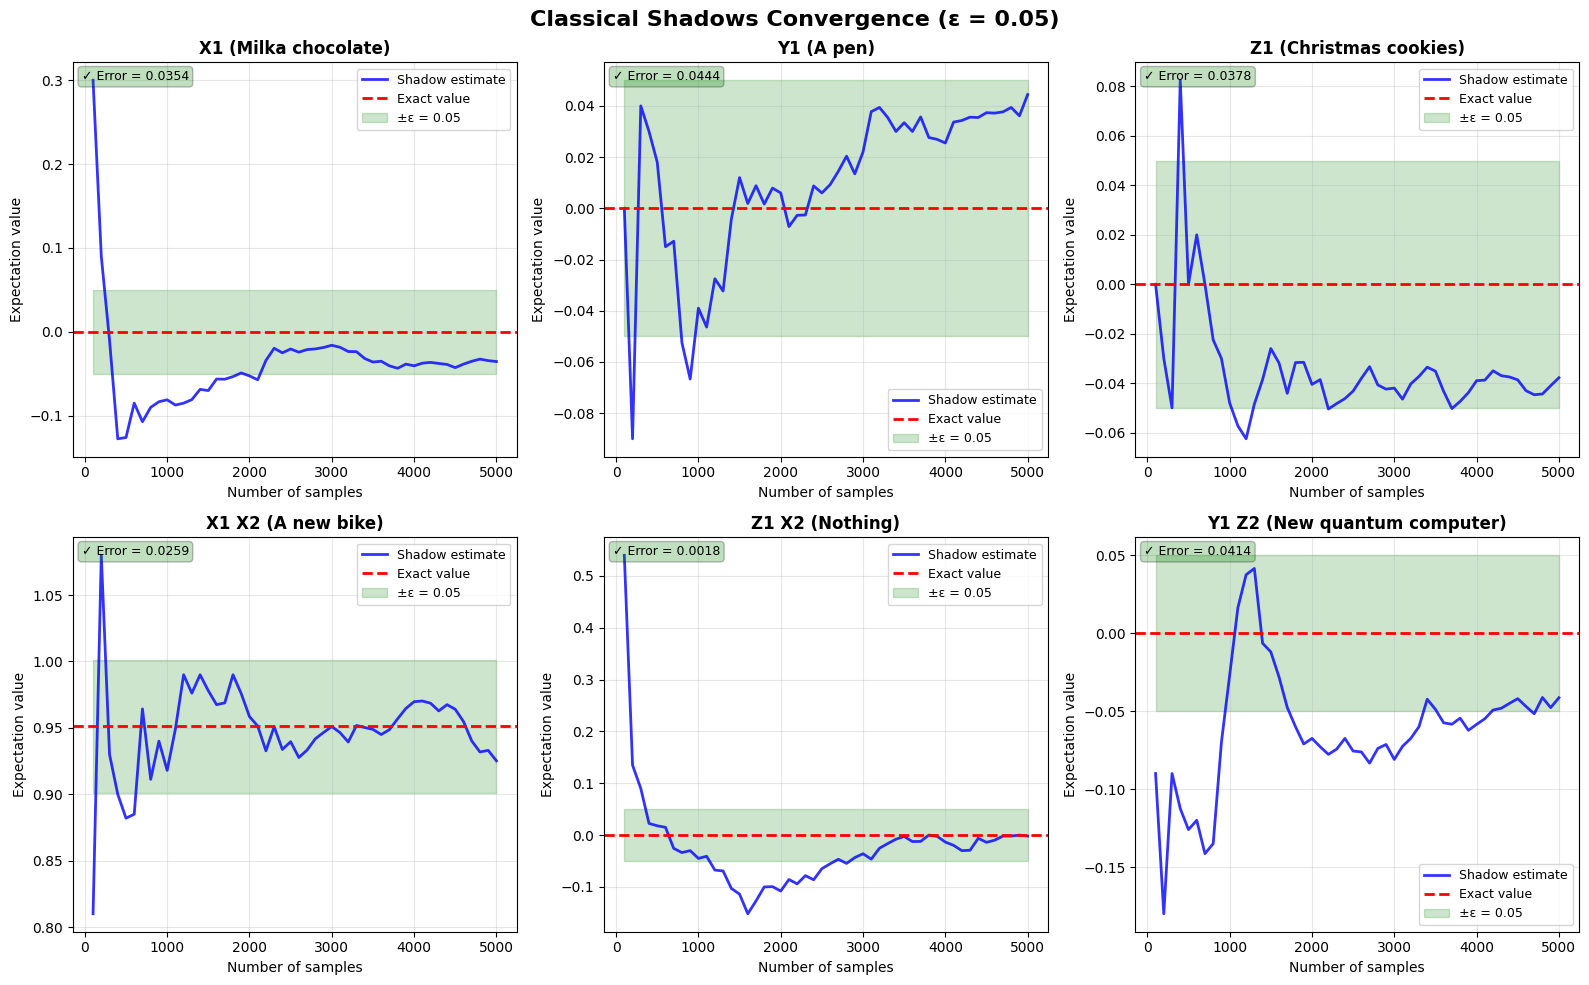

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

epsilon = 0.05

for idx, name in enumerate(gift_observables.keys()):
    ax = axes[idx]

    exact_value = exact_values[name]
    estimates = shadow_estimates[name]

    ax.plot(
        snapshot_sizes, estimates,
        color='blue', linewidth=2, alpha=0.8,
        label='Shadow estimate'
    )

    ax.axhline(
        exact_value, color='red',
        linestyle='--', linewidth=2,
        label='Exact value'
    )

    ax.fill_between(
        snapshot_sizes,
        exact_value - epsilon,
        exact_value + epsilon,
        color='green', alpha=0.2,
        label=f'±ε = {epsilon}'
    )

    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Expectation value')
    ax.grid(alpha=0.3)

    final_error = abs(estimates[-1] - exact_value)
    within_bound = final_error <= epsilon
    status = "✓" if within_bound else "~"
    box_color = "green" if within_bound else "orange"

    ax.text(
        0.02, 0.98,
        f"{status} Error = {final_error:.4f}",
        transform=ax.transAxes,
        fontsize=9,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.25)
    )

    ax.legend(fontsize=9)

plt.suptitle(
    f'Classical Shadows Convergence (ε = {epsilon})',
    fontsize=16, fontweight='bold'
)
plt.tight_layout()
plt.show()


Similary to previous one, this plot also show that as the number of samples increases, the classical shadow estimates become more stable and move closer to the exact expectation values. All observables eventually fall within the ±ε = 0.05 accuracy band.

Now lets just make an final summary of the convergence for each observable.

In [ ]:
rows = []

for name in gift_observables:
    exact = exact_values[name]
    estimate = shadow_estimates[name][-1]
    error = abs(estimate - exact)
    within = error <= epsilon

    rows.append({
        "Observable": name,
        "Exact value": exact,
        "Final estimate": estimate,
        "Error": error,
        "≤ ε": "✓" if within else "✗"
    })

df_summary = pd.DataFrame(rows)

df_summary

,Observable,Exact value,Final estimate,Error,≤ ε
0,X1 (Milka chocolate),-1.110223e-16,-0.0354,0.035400,✓
1,Y1 (A pen),1.110223e-16,0.0444,0.044400,✓
2,Z1 (Christmas cookies),0.000000e+00,-0.0378,0.037800,✓
3,X1 X2 (A new bike),9.510565e-01,0.9252,0.025857,✓
4,Z1 X2 (Nothing),2.775558e-17,-0.0018,0.001800,✓
5,Y1 Z2 (New quantum computer),0.000000e+00,-0.0414,0.041400,✓


---

## Visualize and discuss $$
\left| \langle O \rangle_{\text{exact}} - \langle O \rangle_{\text{shadow}} \right|
$$

In Part 4 we studied the convergence of the shadow estimates themselves.
Now, we should quantify this convergence by explicitly plotting the absolute error between the shadow estimates and the exact expectation values for the same snapshots.

So, lets first calculate absolute difference between the shadow estimate and the exact value (to measure how far the estimate is from the true result).

In [ ]:
abs_errors = {
    name: [
        abs(est - exact_values[name])
        for est in shadow_estimates[name]
    ]
    for name in gift_observables
}

Than, simmilary to the previous plots, lets plot the errors now.

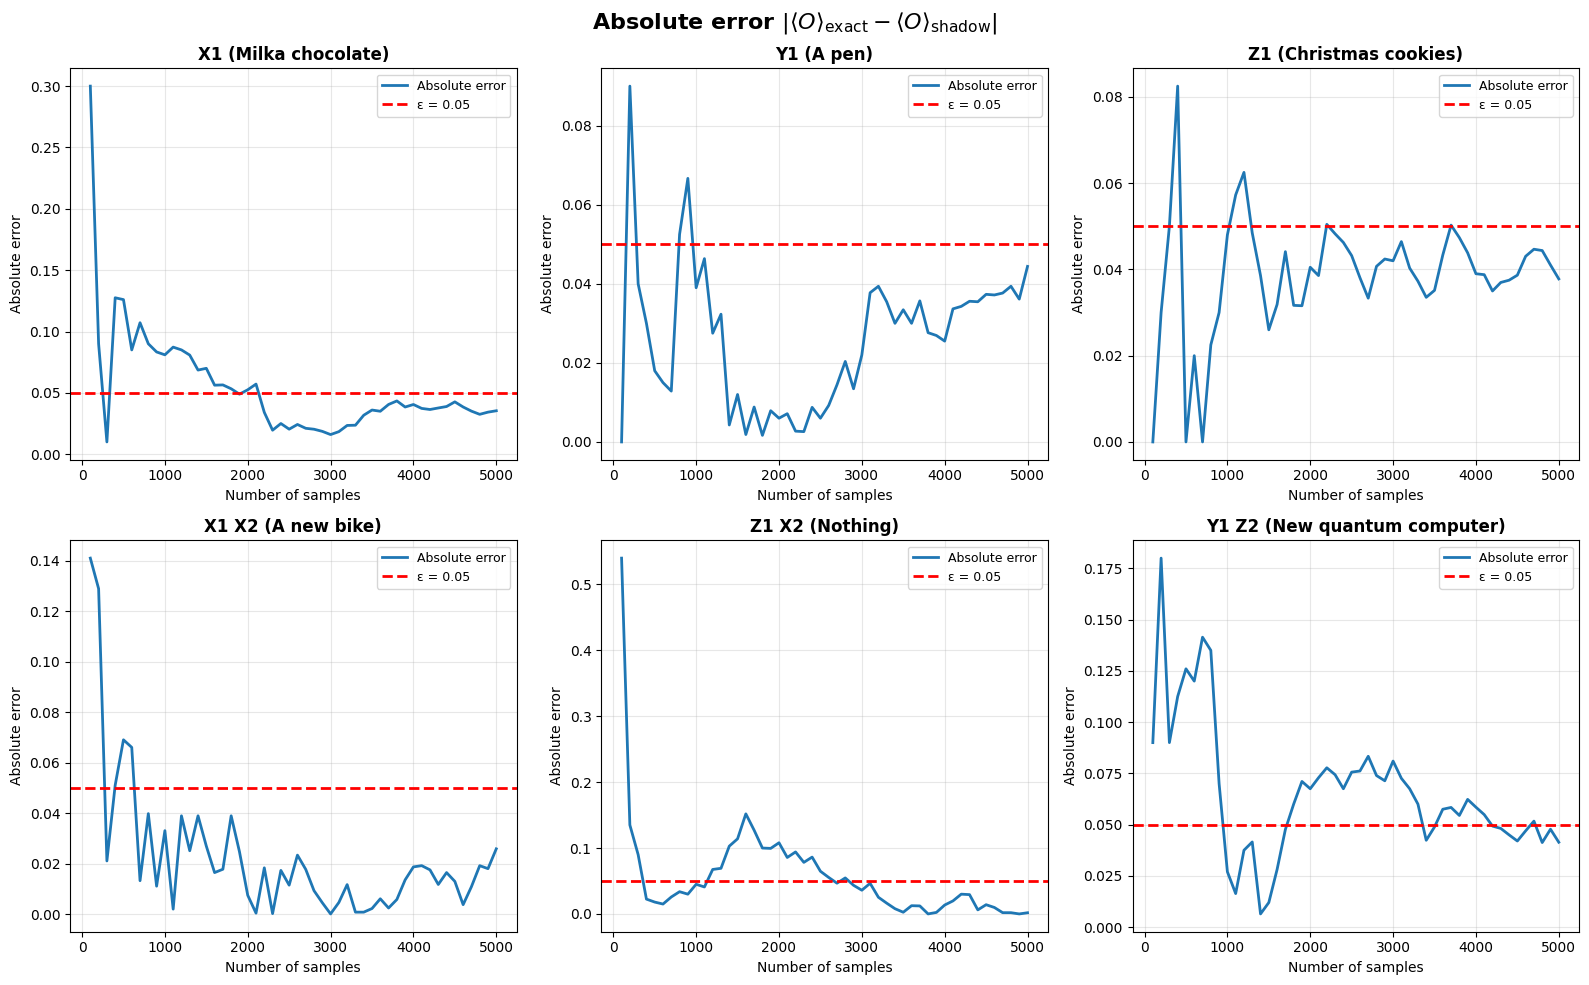

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, name in enumerate(gift_observables):
    ax = axes[idx]

    ax.plot(
        snapshot_sizes,
        abs_errors[name],
        linewidth=2,
        label="Absolute error"
    )

    ax.axhline(
        epsilon,
        linestyle="--",
        linewidth=2,
        color="red",
        label=f"ε = {epsilon}"
    )

    ax.set_title(name, fontsize=12, fontweight="bold")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel("Absolute error")
    ax.grid(alpha=0.3)
    ax.legend(fontsize=9)

plt.suptitle(
    r"Absolute error $|\langle O\rangle_{\mathrm{exact}} - \langle O\rangle_{\mathrm{shadow}}|$",
    fontsize=16,
    fontweight="bold"
)
plt.tight_layout()
plt.show()


The plots show how the absolute error decreases as the number of measurement samples increases.

At the beginning, the error is large because only few random measurements are available, which leads to high statistical noise. As more samples are added, the error decreases and stabilizes.
Single-qubit observables reach the error bound quickly, while two-qubit observables require more samples and show larger fluctuations, which is expected due to their higher shadow norm.